# Loading libraries
Loading the libraries I will need and suppressing the warnings, as per advice from classes.

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set(color_codes=True) 
import sklearn.preprocessing as preproc
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy import stats
import statistics as stats
from scipy.stats import poisson
from scipy.stats import binom
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing
import math

import warnings
warnings.filterwarnings('ignore')

## Data Analysis-
Importing two Dataset and preform EDA analysis.

In [1]:
df_app = pd.read_csv('application_data.csv')
df_pre = pd.read_csv('previous_application.csv')

NameError: name 'pd' is not defined

## Importing the dataset and combining two datasets
Two datasets (application_data and previous_application) are merged based on column that is common to both datasets - "SK_ID_CURR". I saved this new dataset as "merged_dataset".

In [2]:
df1 = pd.read_csv('application_data.csv')
df2 = pd.read_csv('previous_application.csv')

df = pd.merge(df1, df2, on='SK_ID_CURR', how='left')

df.to_csv('merged_dataset.csv', index=False)


### I will set the Pandas display format for floating point numbers to two decimal places

In [3]:
pd.options.display.float_format = '{:.2f}'.format

In [4]:
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1430150,456255,0,Cash loans,F,N,N,0,157500.00,675000.00,49117.50,...,XNA,24.00,middle,Cash X-Sell: middle,365243.00,-618.00,72.00,-558.00,-528.00,1.00
1430151,456255,0,Cash loans,F,N,N,0,157500.00,675000.00,49117.50,...,Connectivity,0.00,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
1430152,456255,0,Cash loans,F,N,N,0,157500.00,675000.00,49117.50,...,XNA,60.00,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
1430153,456255,0,Cash loans,F,N,N,0,157500.00,675000.00,49117.50,...,XNA,36.00,low_normal,Cash X-Sell: low,365243.00,-756.00,294.00,-66.00,-64.00,0.00
1430154,456255,0,Cash loans,F,N,N,0,157500.00,675000.00,49117.50,...,Connectivity,6.00,high,POS mobile with interest,365243.00,-469.00,-319.00,-409.00,-400.00,0.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Columns: 158 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: float64(85), int64(41), object(32)
memory usage: 1.7+ GB


In [6]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430062.00,1428936.00,1430155.00,1430155.00,1430155.00,...,4791.00,1413701.00,1413701.00,1106488.00,852595.00,852595.00,852595.00,852595.00,852595.00,852595.00
mean,278470.25,0.09,0.40,173603.62,589338.59,27042.03,529443.48,0.02,-16314.95,68602.09,...,0.77,-880.37,314.99,16.05,342257.66,13488.74,33274.83,76665.63,82353.17,0.33
std,102802.10,0.28,0.72,198330.29,387420.36,14040.02,355788.24,0.01,4346.74,145196.73,...,0.10,783.54,7695.08,14.57,88832.27,71650.15,106161.78,149704.72,153537.06,0.47
min,100002.00,0.00,0.00,25650.00,45000.00,1615.50,40500.00,0.00,-25229.00,-17912.00,...,0.37,-2922.00,-1.00,0.00,-2922.00,-2892.00,-2801.00,-2889.00,-2874.00,0.00
25%,189361.00,0.00,0.00,112500.00,270000.00,16798.50,238500.00,0.01,-19975.00,-2825.00,...,0.72,-1313.00,-1.00,6.00,365243.00,-1630.00,-1244.00,-1316.00,-1269.00,0.00
50%,278956.00,0.00,0.00,157500.00,508495.50,24916.50,450000.00,0.02,-16037.00,-1277.00,...,0.84,-582.00,4.00,12.00,365243.00,-825.00,-358.00,-534.00,-494.00,0.00
75%,367509.00,0.00,1.00,211500.00,808650.00,34573.50,679500.00,0.03,-12729.50,-282.00,...,0.85,-271.00,85.00,24.00,365243.00,-408.00,135.00,-73.00,-42.00,1.00
max,456255.00,1.00,19.00,117000000.00,4050000.00,258025.50,4050000.00,0.07,-7489.00,365243.00,...,1.00,-1.00,4000000.00,84.00,365243.00,365243.00,365243.00,365243.00,365243.00,1.00


In [ ]:
##Barplot on missing values viaulaization column with maximizing missing values
##Missing percentage = Total missing value per attributes/ total nulber of missing values in the dataset

cols_miss_perc = (df.isnull().sum()*100/df.shape[0]).sort_values(ascending = False)
plt.figure(figsize=(25, 10))
sns.barplot(x =cols_miss_perc.index, y =cols_miss_perc)
plt.title('Barplot for perecentage of missing values in each Attributes')
plt.xlabel('Attribute Names')
plt.xticks(rotation=90)
plt.ylabel('Number of missing values')
plt.show()

# 

# Data Preparation

Since we still have high number of columns (94), I decided to list all the columns and create new dataframe with columns I find relevant for further work.

In [7]:
column_names = df.columns.tolist()

print(column_names)

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONA

## Feature Selections

In [8]:
df = df[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS']]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 25 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   SK_ID_CURR                  1430155 non-null  int64  
 1   TARGET                      1430155 non-null  int64  
 2   NAME_CONTRACT_TYPE_x        1430155 non-null  object 
 3   CODE_GENDER                 1430155 non-null  object 
 4   FLAG_OWN_CAR                1430155 non-null  object 
 5   FLAG_OWN_REALTY             1430155 non-null  object 
 6   CNT_CHILDREN                1430155 non-null  int64  
 7   AMT_INCOME_TOTAL            1430155 non-null  float64
 8   AMT_CREDIT_x                1430155 non-null  float64
 9   AMT_ANNUITY_x               1430062 non-null  float64
 10  NAME_INCOME_TYPE            1430155 non-null  object 
 11  NAME_EDUCATION_TYPE         1430155 non-null  object 
 12  NAME_FAMILY_STATUS          1430155 non-null  object 
 1

### Now we have new dataset with 25 columns and 1430154 rows.

In [10]:
#pip install ydata-profiling

## Removing NaN values.


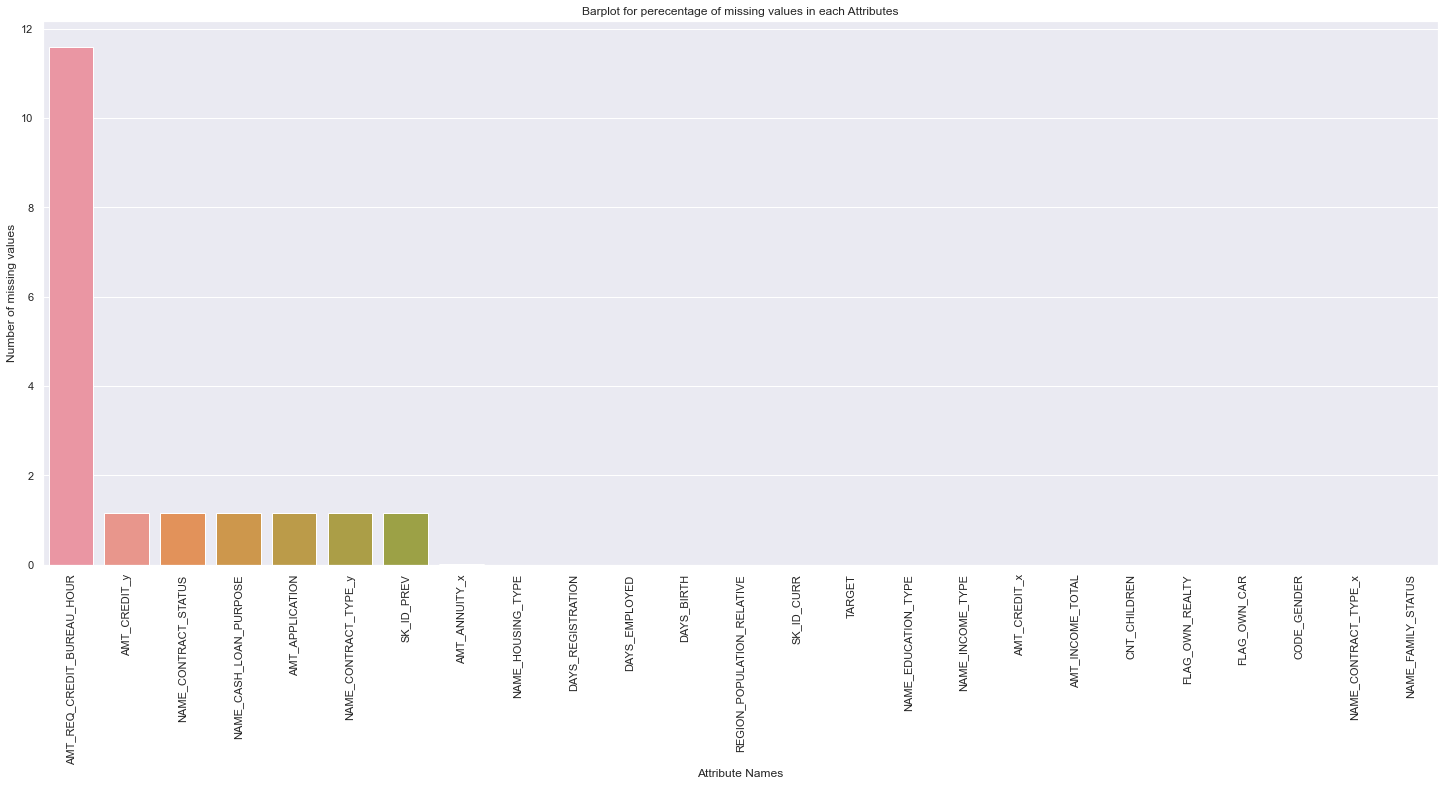

In [11]:
##Barplot on missing values viaulaization column with maximizing missing values
##Missing percentage = Total missing value per attributes/ total nulber of missing values in the dataset

cols_miss_perc = (df.isnull().sum()*100/df.shape[0]).sort_values(ascending = False)
plt.figure(figsize=(25, 10))
sns.barplot(x =cols_miss_perc.index, y =cols_miss_perc)
plt.title('Barplot for perecentage of missing values in each Attributes')
plt.xlabel('Attribute Names')
plt.xticks(rotation=90)
plt.ylabel('Number of missing values')
plt.show()

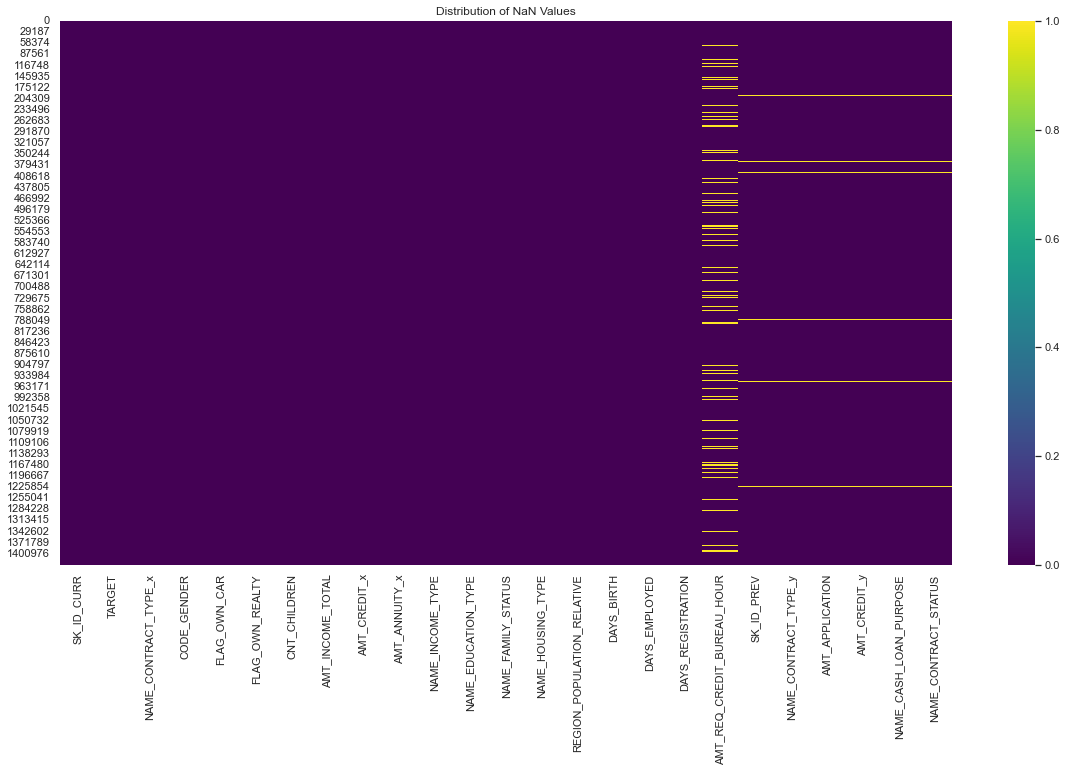

In [12]:
missing_values = df.isnull().sum()

plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Distribution of NaN Values')
plt.show()

### Removing rows with NaN values
Since we had dataset with more than million rows, there was no issue with dropping certain amount of rows and reducing the size of the dataset.
First, I checked number of NaN values:

In [13]:
total_NaN_number = df.isna().sum().sum()
total_NaN_number

264630

### After that, I dropped rows with NaN values:

In [14]:
df = df.dropna()

In [15]:
total_NaN_number = df.isna().sum().sum()

total_NaN_number

0

# 

## Removing duplicates
One more thing I decided to check on this dataset is number of duplicated rows, since I merged two datasets based on SK_ID_CURR column. I will check how many rows have duplicated ID and will remove those rows as well.

In [16]:
duplicates = df['SK_ID_CURR'].duplicated()
num_duplicates = duplicates.sum()
num_duplicates

998275

In [17]:
df = df.drop_duplicates(subset=['SK_ID_CURR'], keep='first')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251712 entries, 0 to 1430147
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  251712 non-null  int64  
 1   TARGET                      251712 non-null  int64  
 2   NAME_CONTRACT_TYPE_x        251712 non-null  object 
 3   CODE_GENDER                 251712 non-null  object 
 4   FLAG_OWN_CAR                251712 non-null  object 
 5   FLAG_OWN_REALTY             251712 non-null  object 
 6   CNT_CHILDREN                251712 non-null  int64  
 7   AMT_INCOME_TOTAL            251712 non-null  float64
 8   AMT_CREDIT_x                251712 non-null  float64
 9   AMT_ANNUITY_x               251712 non-null  float64
 10  NAME_INCOME_TYPE            251712 non-null  object 
 11  NAME_EDUCATION_TYPE         251712 non-null  object 
 12  NAME_FAMILY_STATUS          251712 non-null  object 
 13  NAME_HOUSING_

### Our finalised dataset consist of 251712 rows in 25 columns.

# 

### Converting negative values to absolute values

In [18]:
cols_with_negative = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION']

df[cols_with_negative] = df[cols_with_negative].abs()
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,AMT_REQ_CREDIT_BUREAU_HOUR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,...,9461,637,3648.00,0.00,1038818.00,Consumer loans,179055.00,179055.00,XAP,Approved
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,...,16765,1188,1186.00,0.00,1810518.00,Cash loans,900000.00,1035882.00,XNA,Approved
4,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,...,19046,225,4260.00,0.00,1564014.00,Consumer loans,24282.00,20106.00,XAP,Approved
14,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,...,19932,3038,4311.00,0.00,2001242.00,Cash loans,180000.00,180000.00,XNA,Approved
20,100008,0,Cash loans,M,N,Y,0,99000.00,490495.50,27517.50,...,16941,1588,4970.00,0.00,2218188.00,Consumer loans,162598.50,162598.50,XAP,Approved


## Replacing categorical variables with numerical values

In [19]:
df = df.replace({'N': 0, 'Y': 1})
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,AMT_REQ_CREDIT_BUREAU_HOUR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS
0,100002,1,Cash loans,M,0,1,0,202500.00,406597.50,24700.50,...,9461,637,3648.00,0.00,1038818.00,Consumer loans,179055.00,179055.00,XAP,Approved
1,100003,0,Cash loans,F,0,0,0,270000.00,1293502.50,35698.50,...,16765,1188,1186.00,0.00,1810518.00,Cash loans,900000.00,1035882.00,XNA,Approved
4,100004,0,Revolving loans,M,1,1,0,67500.00,135000.00,6750.00,...,19046,225,4260.00,0.00,1564014.00,Consumer loans,24282.00,20106.00,XAP,Approved
14,100007,0,Cash loans,M,0,1,0,121500.00,513000.00,21865.50,...,19932,3038,4311.00,0.00,2001242.00,Cash loans,180000.00,180000.00,XNA,Approved
20,100008,0,Cash loans,M,0,1,0,99000.00,490495.50,27517.50,...,16941,1588,4970.00,0.00,2218188.00,Consumer loans,162598.50,162598.50,XAP,Approved


### Getting number and names of the object columns

In [20]:
obj_cols = df.select_dtypes(include='object')

num_obj_cols = obj_cols.shape[1]

num_obj_cols

9

In [21]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
object_columns

['NAME_CONTRACT_TYPE_x',
 'CODE_GENDER',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_CONTRACT_TYPE_y',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS']

### Getting all unique values for each object column 

In [22]:
unique_values = df["NAME_CONTRACT_TYPE_x"].unique()
unique_values

array(['Cash loans', 'Revolving loans'], dtype=object)

In [23]:
unique_values = df["CODE_GENDER"].unique()
unique_values

array(['M', 'F', 'XNA'], dtype=object)

In [24]:
unique_values = df["NAME_INCOME_TYPE"].unique()
unique_values

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student'], dtype=object)

In [25]:
unique_values = df["NAME_EDUCATION_TYPE"].unique()
unique_values

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [26]:
unique_values = df["NAME_FAMILY_STATUS"].unique()
unique_values

array(['Single / not married', 'Married', 'Widow', 'Civil marriage',
       'Separated'], dtype=object)

In [27]:
unique_values = df["NAME_HOUSING_TYPE"].unique()
unique_values

array(['House / apartment', 'Rented apartment', 'Municipal apartment',
       'With parents', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [28]:
unique_values = df["NAME_CASH_LOAN_PURPOSE"].unique()
unique_values

array(['XAP', 'XNA', 'Repairs', 'Other', 'Building a house or an annex',
       'Urgent needs', 'Car repairs', 'Buying a new car', 'Medicine',
       'Furniture', 'Education', 'Buying a used car',
       'Purchase of electronic equipment', 'Everyday expenses',
       'Wedding / gift / holiday', 'Buying a holiday home / land',
       'Payments on other loans', 'Buying a home', 'Business development',
       'Journey', 'Gasification / water supply', 'Buying a garage',
       'Hobby', 'Money for a third person', 'Refusal to name the goal'],
      dtype=object)

In [29]:
unique_values = df["NAME_CONTRACT_STATUS"].unique()
unique_values

array(['Approved', 'Refused', 'Canceled', 'Unused offer'], dtype=object)

### Replacing all categorical variables with numeric values

In [30]:
df = df.replace({'Cash loans': 0, 'Revolving loans': 1, 'Consumer loans':2,
                'M': 0, 'F': 1, 'XNA': 3,
                'Unemployed': 0, 'Working': 1, 'State servant': 2, 'Commercial associate': 3, 'Pensioner': 4, 'Student': 5,
                'Secondary / secondary special': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Academic degree': 4,
                'Single / not married': 0, 'Married': 1, 'Widow': 2, 'Civil marriage': 3, 'Separated': 4,
                'House / apartment': 0, 'Rented apartment': 1, 'Municipal apartment': 2, 'With parents': 3, 'Office apartment': 4, 'Co-op apartment': 5,
                'XAP': 0, 'Repairs': 1, 'Other': 2, 'Building a house or an annex': 4, 'Urgent needs': 5, 'Car repairs': 6, 'Medicine': 7, 'Furniture': 8, 'Education': 9, 'Buying a used car': 10, 'Purchase of electronic equipment': 11, 'Everyday expenses': 12, 'Wedding / gift / holiday': 13, 'Buying a holiday home / land': 14, 'Buying a home': 15, 'Payments on other loans': 16, 'Business development': 17, 'Buying a new car': 18, 'Journey': 19, 'Gasification / water supply': 20, 'Buying a garage': 21, 'Hobby': 22, 'Money for a third person': 23, 'Refusal to name the goal': 24,
                'Refused': 0, 'Approved': 1, 'Canceled': 0, 'Unused offer': 0})
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,AMT_REQ_CREDIT_BUREAU_HOUR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS
0,100002,1,0,0,0,1,0,202500.00,406597.50,24700.50,...,9461,637,3648.00,0.00,1038818.00,2,179055.00,179055.00,0,1
1,100003,0,0,1,0,0,0,270000.00,1293502.50,35698.50,...,16765,1188,1186.00,0.00,1810518.00,0,900000.00,1035882.00,3,1
4,100004,0,1,0,1,1,0,67500.00,135000.00,6750.00,...,19046,225,4260.00,0.00,1564014.00,2,24282.00,20106.00,0,1
14,100007,0,0,0,0,1,0,121500.00,513000.00,21865.50,...,19932,3038,4311.00,0.00,2001242.00,0,180000.00,180000.00,3,1
20,100008,0,0,0,0,1,0,99000.00,490495.50,27517.50,...,16941,1588,4970.00,0.00,2218188.00,2,162598.50,162598.50,0,1


### Our dataset is now completely filled with numerical values only

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251712 entries, 0 to 1430147
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  251712 non-null  int64  
 1   TARGET                      251712 non-null  int64  
 2   NAME_CONTRACT_TYPE_x        251712 non-null  int64  
 3   CODE_GENDER                 251712 non-null  int64  
 4   FLAG_OWN_CAR                251712 non-null  int64  
 5   FLAG_OWN_REALTY             251712 non-null  int64  
 6   CNT_CHILDREN                251712 non-null  int64  
 7   AMT_INCOME_TOTAL            251712 non-null  float64
 8   AMT_CREDIT_x                251712 non-null  float64
 9   AMT_ANNUITY_x               251712 non-null  float64
 10  NAME_INCOME_TYPE            251712 non-null  int64  
 11  NAME_EDUCATION_TYPE         251712 non-null  int64  
 12  NAME_FAMILY_STATUS          251712 non-null  int64  
 13  NAME_HOUSING_

## List of replacements in dataset

#### NAME_CONTRACT_TYPE_x
Cash loans: 0, Revolving loans: 1, Consumer loans: 2
#### CODE_GENDER
M: 0, F: 1, XNA: 3
#### NAME_INCOME_TYPE
Unemployed: 0, Working: 1, State servant: 2, Commercial associate: 3, Pensioner: 4, Student: 5
#### NAME_EDUCATION_TYPE
Secondary / secondary special: 0, Higher education: 1, Incomplete higher: 2, Lower secondary: 3, Academic degree: 4
#### NAME_FAMILY_STATUS
Single / not married: 0, Married: 1, Widow: 2, Civil marriage: 3, Separated: 4
#### NAME_HOUSING_TYPE
House / apartment: 0, Rented apartment: 1, Municipal apartment: 2, With parents: 3, Office apartment: 4, Co-op apartment: 5
#### NAME_CASH_LOAN_PURPOSE
XAP: 0, 'Repairs': 1, 'Other': 2, XNA: 3, 'Building a house or an annex': 4, 'Urgent needs': 5, 'Car repairs': 6, 'Medicine': 7, 'Furniture': 8, 'Education': 9, 'Buying a used car': 10, 'Purchase of electronic equipment': 11, 'Everyday expenses': 12, 'Wedding / gift / holiday': 13, 'Buying a holiday home / land': 14, 'Buying a home': 15, 'Payments on other loans': 16, 'Business development': 17, 'Buying a new car': 18, 'Journey': 19, 'Gasification / water supply': 20, 'Buying a garage': 21, 'Hobby': 22, 'Money for a third person': 23, 'Refusal to name the goal': 24
#### NAME_CONTRACT_STATUS
'Approved': 1, 'Refused': 0, 'Canceled': 0, 'Unused offer': 0 (NAME_CONTRACT_STATUS is our target column where we see if customer was successful or not with application. In this case, 1 stands for Approved and that's successful customer why all other outcomems are unsuccessful, therefore 0.)


# 

# Decision Tree Model

### Feature selection

In [32]:
feature_cols = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'NAME_CONTRACT_TYPE_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'NAME_CASH_LOAN_PURPOSE']
X = df[feature_cols]             
y = df.NAME_CONTRACT_STATUS               

print(X, y)

         CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0                  0             0                1             0   
1                  1             0                0             0   
4                  0             1                1             0   
14                 0             0                1             0   
20                 0             0                1             0   
...              ...           ...              ...           ...   
1430130            1             0                1             0   
1430139            1             0                1             0   
1430143            1             0                1             0   
1430145            1             0                1             0   
1430147            1             0                0             0   

         AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  NAME_INCOME_TYPE  \
0               202500.00     406597.50       24700.50                 1   
1               270

In [33]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

importance = rfe.ranking_
importance

array([13, 15, 14, 10,  5,  2,  1, 11,  9,  7, 12,  3,  1,  1,  1, 16,  6,
        4,  1,  8])

In [34]:
# Create a list of column names
col_names = X.columns

# Create a list of tuples containing column names and their rankings
feat_ranks = list(zip(col_names, rfe.ranking_))

# Sort the list by ascending order of ranking
feat_ranks_sorted = sorted(feat_ranks, key=lambda x: x[1])

# Print the list of column names and their rankings
for i, (col, rank) in enumerate(feat_ranks_sorted):
    print(f"{i+1}. {col}: {rank}")

1. AMT_ANNUITY_x: 1
2. DAYS_BIRTH: 1
3. DAYS_EMPLOYED: 1
4. DAYS_REGISTRATION: 1
5. AMT_CREDIT_y: 1
6. AMT_CREDIT_x: 2
7. REGION_POPULATION_RELATIVE: 3
8. AMT_APPLICATION: 4
9. AMT_INCOME_TOTAL: 5
10. NAME_CONTRACT_TYPE_y: 6
11. NAME_FAMILY_STATUS: 7
12. NAME_CASH_LOAN_PURPOSE: 8
13. NAME_EDUCATION_TYPE: 9
14. CNT_CHILDREN: 10
15. NAME_INCOME_TYPE: 11
16. NAME_HOUSING_TYPE: 12
17. CODE_GENDER: 13
18. FLAG_OWN_REALTY: 14
19. FLAG_OWN_CAR: 15
20. AMT_REQ_CREDIT_BUREAU_HOUR: 16


In [35]:
feature_cols = ['AMT_ANNUITY_x', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'AMT_CREDIT_y', 'AMT_APPLICATION', 'REGION_POPULATION_RELATIVE', 'AMT_INCOME_TOTAL']
X = df[feature_cols]             
y = df.NAME_CONTRACT_STATUS               

print(X, y)

         AMT_ANNUITY_x  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0             24700.50        9461            637            3648.00   
1             35698.50       16765           1188            1186.00   
4              6750.00       19046            225            4260.00   
14            21865.50       19932           3038            4311.00   
20            27517.50       16941           1588            4970.00   
...                ...         ...            ...                ...   
1430130       17770.50       11870            399             675.00   
1430139       22050.00       24384         365243            7369.00   
1430143       29979.00       14966           7921            6737.00   
1430145       20205.00       11961           4786            2562.00   
1430147       49117.50       16856           1262            5128.00   

         AMT_CREDIT_y  AMT_APPLICATION  REGION_POPULATION_RELATIVE  \
0           179055.00        179055.00                        0.0

### Splitting dataset into training set and test set (70% training and 30% test)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [37]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((251712, 8), (251712,), (176198, 8), (75514, 8), (176198,), (75514,))

In [38]:
clsf = DecisionTreeClassifier(max_depth = 4, random_state = 0)

clsf = clsf.fit(X_train, y_train)

y_pred = clsf.predict(X_test)

### Evaluating Model - how often is the classifier correct?

In [39]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8760627168472072


### Calculating Train and Test score

In [40]:
train_score = clsf.score(X_train, y_train)
print("Training set score:", train_score)

test_score = clsf.score(X_test, y_test)
print("Test set score:", test_score)

Training set score: 0.877478745502219
Test set score: 0.8760627168472072


Scores are relatively close to each other and the difference between them is not significant. That means, it is less likely that the model is overfitting or underfitting. 

In [41]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

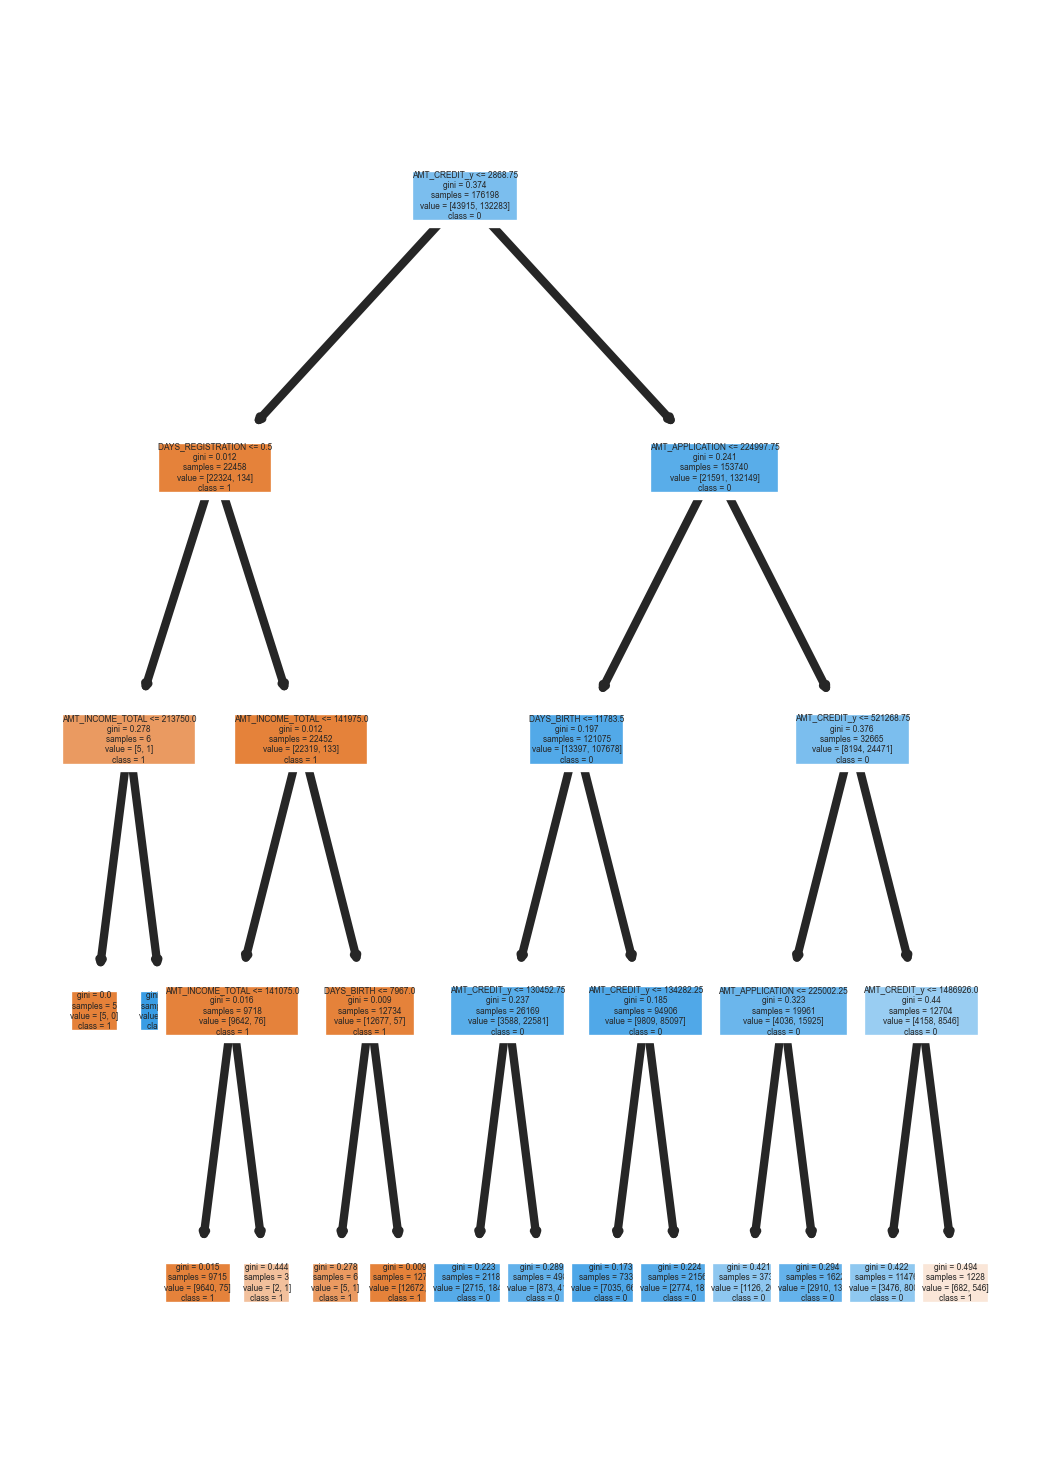

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(2, 3), dpi=600)
tree.plot_tree(clsf, feature_names=feature_cols, class_names=df.NAME_CONTRACT_STATUS.unique().astype('str'), ax=axes, filled=True);
plt.show()

# PCA
Before starting with PCA, I will scale the data.

In [43]:
#Divide the dataset in X and y according to the dependent variable "TARGET".
X=df.drop('TARGET', axis=1)
y=df['TARGET']

In [44]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((251712, 24), (251712,), (188784, 24), (62928, 24), (188784,), (62928,))

In [45]:
from sklearn.preprocessing import StandardScaler

# Create an object using Standard scalscaler
scaler = StandardScaler()

# Train the StandardScaler model
scaler.fit(X_train)

# transform data
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)
X_scaled = scaler.transform(X)

# print dataset after scaling
print(X_train_scaled, '\t', X_test_scaled, '\t', X_scaled)

[[ 0.93170692 -0.31683361  0.70743549 ... -0.49659775 -0.56117291
   0.57744813]
 [-0.16494003  3.15623083 -1.41335439 ... -0.06050537 -0.56117291
   0.57744813]
 [-0.28496035 -0.31683361 -1.41335439 ... -0.40576506 -0.56117291
   0.57744813]
 ...
 [ 0.08515009 -0.31683361  0.70743549 ...  0.11424759 -0.56117291
  -1.73175726]
 [ 0.29156289 -0.31683361  0.70743549 ... -0.20686796 -0.56117291
  -1.73175726]
 [-0.05176191 -0.31683361  0.70743549 ... -0.25007068 -0.56117291
   0.57744813]] 	 [[-0.09849101 -0.31683361  0.70743549 ...  0.31059367  1.12004819
   0.57744813]
 [ 0.55943884  3.15623083 -1.41335439 ... -0.46565638 -0.56117291
   0.57744813]
 [-0.82375432 -0.31683361  0.70743549 ... -0.18560399  1.12004819
   0.57744813]
 ...
 [-0.04386033 -0.31683361  0.70743549 ... -0.6209393   1.12004819
  -1.73175726]
 [ 0.25595236 -0.31683361 -1.41335439 ... -0.53194992 -0.56117291
   0.57744813]
 [ 0.90449363 -0.31683361  0.70743549 ... -0.21113063 -0.56117291
   0.57744813]] 	 [[-1.7298985

In [46]:
from sklearn.decomposition import PCA

# keep the first two principal components of the data
pca = PCA(n_components = 20)

# transform data into the first two principal components
X_pca = pca.fit_transform(X_scaled)

print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (251712, 24)
Reduced shape: (251712, 20)


In [47]:
# The amount of variance explained by each of the selected components.
print(pca.explained_variance_ratio_)

[0.23593176 0.09778841 0.08138251 0.06352726 0.04917687 0.04135683
 0.03986078 0.03574929 0.03455154 0.03369734 0.03335838 0.03320271
 0.03244995 0.03021938 0.02731968 0.02650926 0.02582696 0.02128384
 0.02068347 0.01442387]


In [48]:
#pip install mglearn

Text(0, 0.5, 'cumulative explained variance')

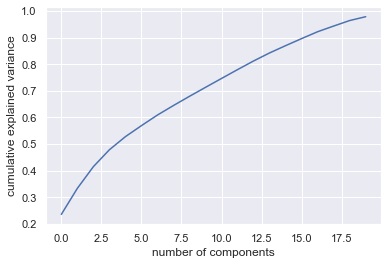

In [49]:
#apply PCA to determinate principle components which hold 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

<AxesSubplot:>

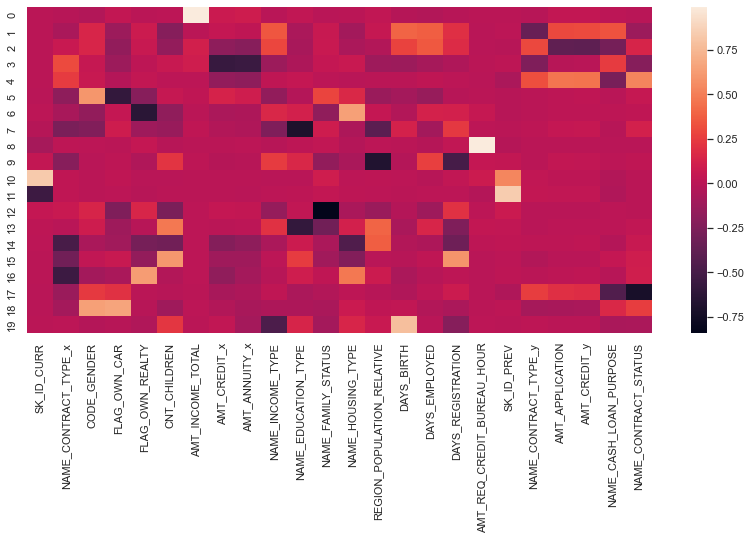

In [50]:
import seaborn as sns
df_comp = pd.DataFrame(pca.components_, columns = X.columns)
  
plt.figure(figsize =(14, 6))
  
# plotting heatmap
sns.heatmap(df_comp)

# Model Building
# Objective 1 - fitting Classification model to predict the target value.

Logistic Regression



In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
# Create an object by calling a method LogisticRegression()
lr = LogisticRegression()

# Train the model by calling a fit() method
lr.fit(X_train_scaled, y_train)

# Predict the values
y_pred = lr.predict(X_test_scaled)

# Call and display confusion matrix results
confusion_matrix(y_test, y_pred)

array([[57967,     0],
       [ 4961,     0]], dtype=int64)

In [52]:
accuracy = accuracy_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

print(accuracy, recall)

0.9211638698194762 0.0


In [53]:
#!pip install imblearn
#!pip install --upgrade scikit-learn
#!pip install --upgrade threadpoolctl

In [54]:
# SMOTE - applying SMOTE to balance the datapoint since target variable has more 'No' datapoints than 'Yes'
from imblearn.over_sampling import SMOTE 

smt = SMOTE()

X_train_bal, y_train_bal = smt.fit_resample(X_train_scaled, y_train)

In [55]:
# Create an object by calling a method LogisticRegression()
lr = LogisticRegression()

# Train the model by calling a fit() method
lr.fit(X_train_bal, y_train_bal)

# Predict the values
y_pred = lr.predict(X_test_scaled)

# Call and display confusion matrix results
confusion_matrix(y_test, y_pred)

array([[35292, 22675],
       [ 2005,  2956]], dtype=int64)

In [56]:
accuracy = accuracy_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

print(accuracy, recall)

0.6078057462496822 0.5958476113686757


In [57]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
parameters = {
   'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
   'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
logreg = LogisticRegression()
clf = GridSearchCV(logreg, 
                   param_grid = parameters,
                   scoring = 'accuracy', 
                   cv = 3)
clf.fit(X_train_bal, y_train_bal)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [59]:
GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': np.array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [60]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',clf.best_score_,'using',clf.best_params_)

We can get accuracy of 0.6131692208680263 using {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}


In [61]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.03,0.00,0.00,0.00,0.00,l1,newton-cg,"{'C': 0.001, 'penalty': 'l1', 'solver': 'newto...",NaN,NaN,NaN,NaN,NaN,29
1,0.03,0.00,0.00,0.00,0.00,l1,lbfgs,"{'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,NaN,NaN,NaN,29
2,0.67,0.09,0.02,0.00,0.00,l1,liblinear,"{'C': 0.001, 'penalty': 'l1', 'solver': 'libli...",0.61,0.61,0.61,0.61,0.00,28
3,1.84,0.07,0.01,0.00,0.00,l2,newton-cg,"{'C': 0.001, 'penalty': 'l2', 'solver': 'newto...",0.61,0.62,0.61,0.61,0.00,23
4,0.41,0.01,0.02,0.00,0.00,l2,lbfgs,"{'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}",0.61,0.62,0.61,0.61,0.00,22
5,0.77,0.02,0.01,0.00,0.00,l2,liblinear,"{'C': 0.001, 'penalty': 'l2', 'solver': 'libli...",0.61,0.62,0.61,0.61,0.00,1
6,0.04,0.00,0.00,0.00,0.01,l1,newton-cg,"{'C': 0.01, 'penalty': 'l1', 'solver': 'newton...",NaN,NaN,NaN,NaN,NaN,29
7,0.03,0.00,0.00,0.00,0.01,l1,lbfgs,"{'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,NaN,NaN,NaN,29
8,1.07,0.27,0.01,0.00,0.01,l1,liblinear,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...",0.61,0.62,0.61,0.61,0.00,27
9,1.85,0.07,0.02,0.01,0.01,l2,newton-cg,"{'C': 0.01, 'penalty': 'l2', 'solver': 'newton...",0.61,0.62,0.61,0.61,0.00,24


In [62]:
# LogisticRegression best fit and check the test and train accuracy 
logreg = LogisticRegression(C= 0.01, penalty='l1', solver= 'liblinear')
logreg.fit(X_train_bal, y_train_bal)

# Predict the values
y_pred1 = lr.predict(X_test_scaled)

# Call and display confusion matrix results
confusion_matrix(y_test, y_pred1)

array([[35292, 22675],
       [ 2005,  2956]], dtype=int64)

In [63]:
accuracy = accuracy_score(y_test, y_pred1)

recall = recall_score(y_test, y_pred1)

print(accuracy, recall)

0.6078057462496822 0.5958476113686757


Randomforest



In [64]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [65]:
# fit
rfc.fit(X_train_bal, y_train_bal)

RandomForestClassifier()

RandomForestClassifier()


In [66]:
# Making predictions
predictions = rfc.predict(X_test_scaled)

In [67]:
print(confusion_matrix(y_test,predictions))

[[56824  1143]
 [ 4729   232]]


In [68]:
accuracy = accuracy_score(y_test, predictions)

recall = recall_score(y_test, predictions)

print(accuracy,recall)

0.9066870073735063 0.04676476516831284


In [70]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             max_features=10,
                             n_estimators=100)

In [71]:
rf.fit(X_train_bal, y_train_bal)

KeyboardInterrupt: 

In [ ]:
# predict
predictions = rfc.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, predictions)

recall = recall_score(y_test, predictions)

print(accuracy,recall)

KNN Classification

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier()

In [73]:
# fit the model with the training data
model.fit(X_train,y_train)

KNeighborsClassifier()

In [74]:
# predict the target on the train dataset
predict_train = model.predict(X_train)
predict_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
trainaccuracy = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', trainaccuracy)

accuracy_score on train dataset :  0.9230549199084668
